# Titanic EDA Script

In [ ]:
# Importing Tools & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Dataset
df=pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df.head()

# Data Cleaning

In [ ]:
# Copy To Preseve Orignal
data = df.copy

In [ ]:
# Handling missing values
df.isna().sum()

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'],inplace=True)

In [ ]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

# Handling Outliers

def remove_outliers(df,col):
    Q1 , Q3 = df[col].quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    return df[(df[col]>= lower_bound) & (df[col]<= upper_bound)] 

In [ ]:
df=remove_outliers(df , 'Age')
df=remove_outliers(df , 'Fare')

# Visualization

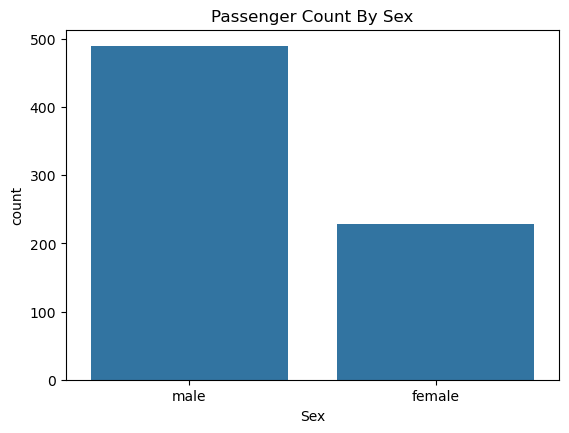

In [75]:
# Bar Chart for Categorical variable : Sex
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x='Sex')
plt.title('Passenger Count By Sex')
plt.show()

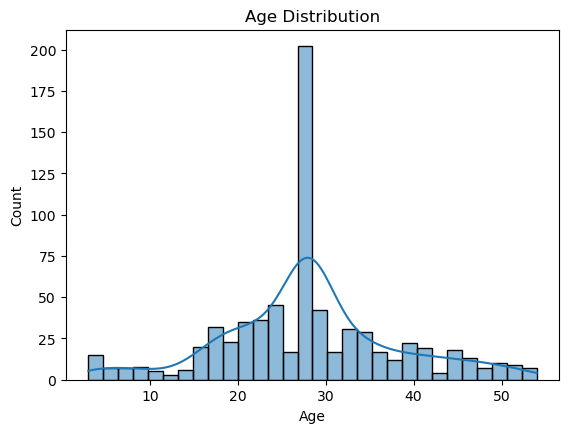

In [76]:
# Histogram for Age Distribution
plt.figure(figsize=(14,10))
plt.subplot(2,2,2)
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

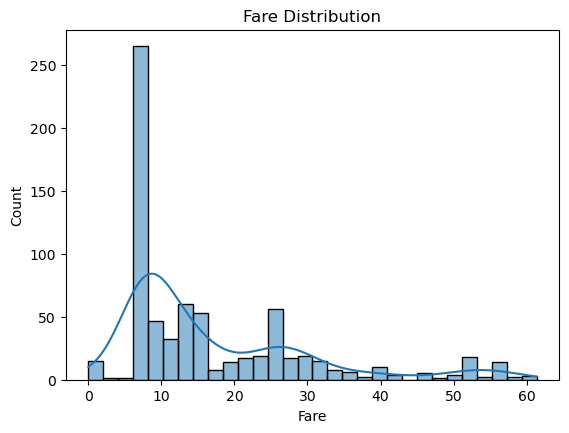

In [77]:
# Histogram for Fare Distribution
plt.figure(figsize=(14,10))
plt.subplot(2,2,3)
sns.histplot(df['Fare'],bins=30,kde=True)
plt.title('Fare Distribution')
plt.show()

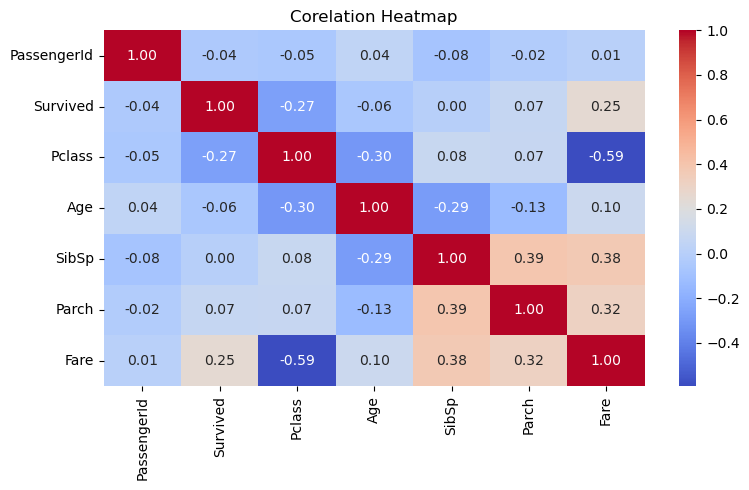

In [78]:
# Corelation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Corelation Heatmap')
plt.tight_layout()
plt.show()
           

# Summerizing Insights

In [64]:
print("\n====Summerizing Insights====")
print(f"Total Valid Entries = {len(df)}")
print(f"Survival Rate = {round(df['Survived'].mean() * 100,2)}%")
print(f"Embarktion Port = {df['Embarked'].mode()[0]}")
print(f"Median Age = {df['Age'].median()}")
print(f"Median Fare = {df['Fare'].median()}")
print(f"Sex Distribution : \n{df['Sex'].value_counts().to_string()}")
print(f"Pclass Distribution : \n{df['Pclass'].value_counts().to_string()}")


====Summerizing Insights====
Total Valid Entries = 718
Survival Rate = 33.43%
Embarktion Port = S
Median Age = 28.0
Median Fare = 11.75
Sex Distribution : 
Sex
male      489
female    229
Pclass Distribution : 
Pclass
3    462
2    162
1     94


In [74]:
print('EDA Process Complete !')

EDA Process Complete !
